# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [30]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [31]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = cleaned_data["Mouse ID"].nunique()
number_of_mice_cleaned

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Calculate summary statistics for each drug regimen
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    StdDev="std",
    SEM="sem"
).reset_index()
summary_stats.head()

,Drug Regimen,Mean,Median,Variance,StdDev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    StdDev="std",
    SEM="sem"
)
summary_stats_advanced.head()

,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

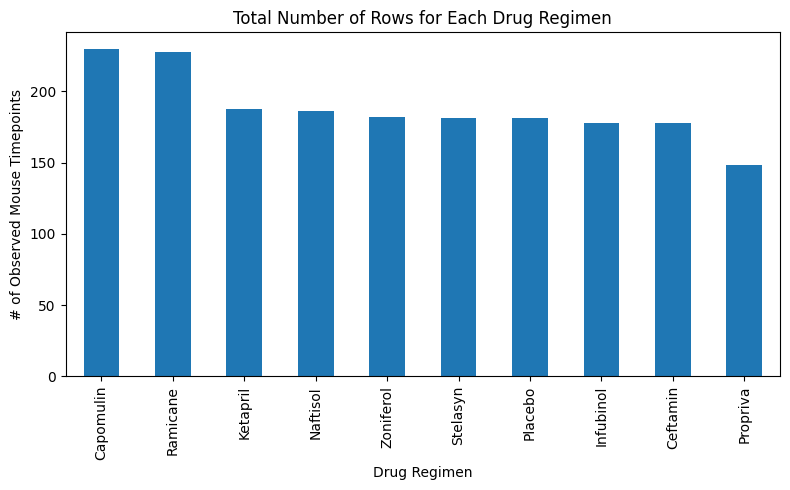

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_counts = cleaned_data["Drug Regimen"].value_counts()

# Create the bar plot
row_counts.plot(kind="bar", title="Total Number of Rows for Each Drug Regimen", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", figsize=(8, 5))

# Show the plot
plt.tight_layout()
plt.show()

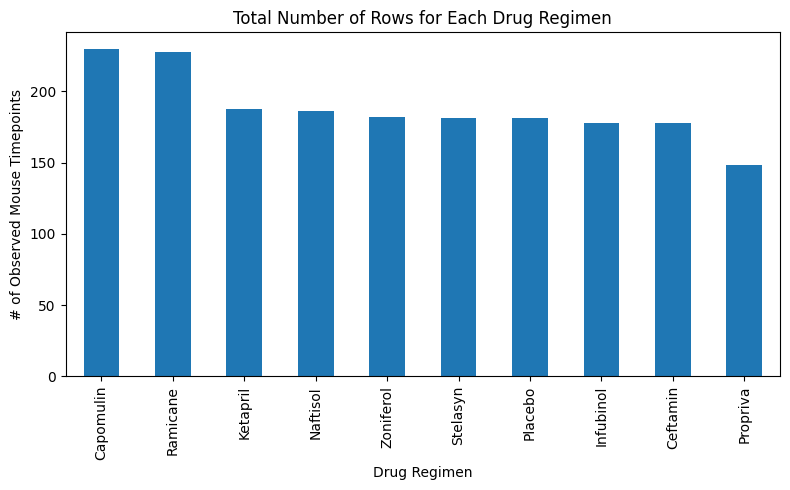

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_counts = cleaned_data["Drug Regimen"].value_counts()

# Create the bar plot
row_counts.plot(kind="bar", title="Total Number of Rows for Each Drug Regimen", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", figsize=(8, 5))

# Show the plot
plt.tight_layout()
plt.show()

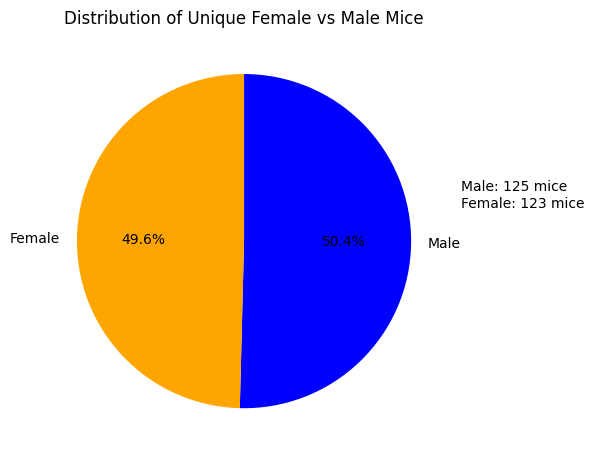

In [38]:
# Get the unique mice with their gender
unique_mice_gender = cleaned_data.drop_duplicates(subset=["Mouse ID"])[["Mouse ID", "Sex"]]

# Calculate the distribution of male vs female mice
gender_distribution = unique_mice_gender["Sex"].value_counts()
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

fig, ax = plt.subplots(figsize=(6, 6))
gender_distribution.plot.pie(
    autopct="%1.1f%%",
    colors=["blue", "orange"],
    startangle=90,
    counterclock=False,
    ylabel="",
    title="Distribution of Unique Female vs Male Mice",
    ax=ax
)

# Add count labels on the side
for i, (index, count) in enumerate(gender_distribution.items()):
    ax.text(
        1.3, 
        0.3 - (i * 0.1), 
        f"{index}: {count} mice", 
        color="black", 
        fontsize=10
    )

# Show the plot
plt.tight_layout()
plt.show()

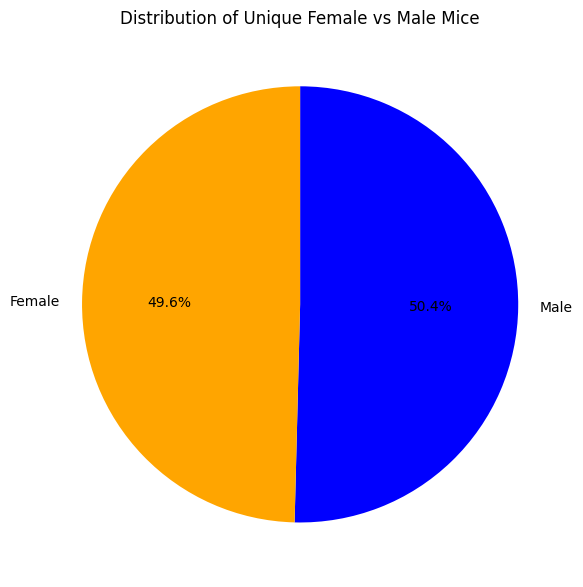

In [39]:


# Generate the pie chart using Pyplot
plt.figure(figsize=(6, 6))
plt.pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct="%1.1f%%",
    colors=["blue", "orange"],
    startangle=90,
    counterclock=False
)
plt.title("Distribution of Unique Female vs Male Mice")
plt.tight_layout()

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [40]:

# Filter for the selected treatment regimens
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = cleaned_data[cleaned_data["Drug Regimen"].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=["Mouse ID", "Timepoint"])


In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through treatments and calculate IQR and identify potential outliers
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_data)  # Add subset
    
    # Calculate the IQR
    q1 = tumor_data.quantile(0.25)
    q3 = tumor_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Determine outliers using upper and lower bounds
    outliers = tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\eddy2\AppData\Local\Temp\ipykernel_1392\841987396.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


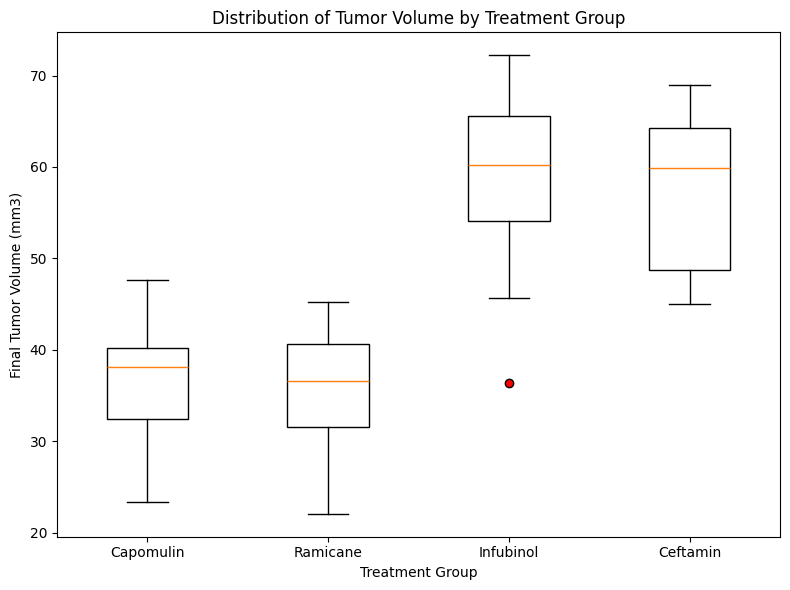

In [42]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))

# Create the box plot with custom properties
boxprops = dict(facecolor="white", color="black")  # White boxes with black borders
flierprops = dict(marker="o", markerfacecolor="red", markeredgecolor="black")  # Red dots with black outlines
plt.boxplot(
    tumor_vol_data,
    labels=treatment_list,
    patch_artist=True,
    boxprops=boxprops,
    flierprops=flierprops,
)

# Add title and labels
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

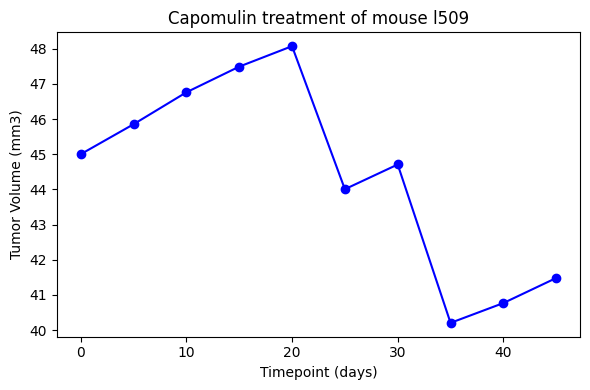

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_l509 = cleaned_data[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == "l509")]

# Generating the line plot
plt.figure(figsize=(6, 4))
plt.plot(
    capomulin_mouse_l509["Timepoint"], 
    capomulin_mouse_l509["Tumor Volume (mm3)"], 
    marker="o", 
    color="blue"
)

# Adding titles and labels
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Displaying the plot
plt.tight_layout()
plt.show()

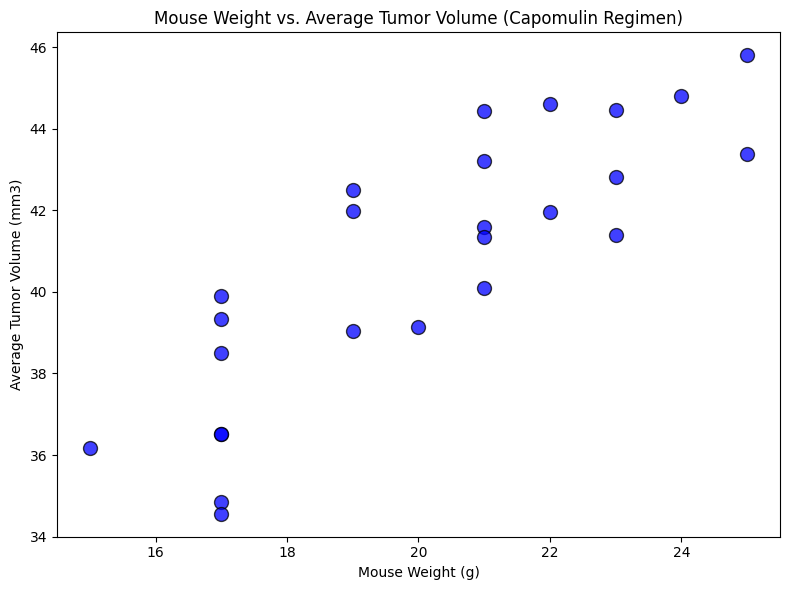

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
avg_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"}, inplace=True)

# Merge with weight data
capomulin_weight_data = capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates()
scatter_data = pd.merge(avg_tumor_volume, capomulin_weight_data, on="Mouse ID")

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    scatter_data["Weight (g)"], 
    scatter_data["Avg Tumor Volume (mm3)"], 
    color="blue", 
    edgecolor="black", 
    alpha=0.75, 
    s=100,  # Size of the circle marker
    marker="o"  # Circle marker
)

# Add title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.tight_layout()
plt.show()

## Correlation and Regression

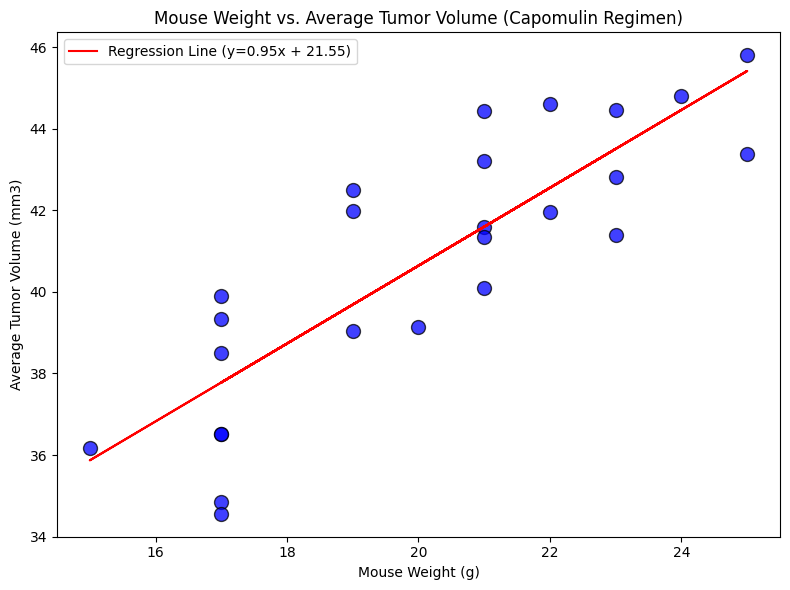

The correlation between mouse weight and the average tumor volume is 0.84.


In [45]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = scatter_data["Weight (g)"].corr(scatter_data["Avg Tumor Volume (mm3)"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    scatter_data["Weight (g)"], scatter_data["Avg Tumor Volume (mm3)"]
)

# Generate regression line
regression_line = slope * scatter_data["Weight (g)"] + intercept

# Plot the scatter plot with circular markers and regression line
plt.figure(figsize=(8, 6))
plt.scatter(
    scatter_data["Weight (g)"], 
    scatter_data["Avg Tumor Volume (mm3)"], 
    color="blue", 
    edgecolor="black", 
    alpha=0.75, 
    s=100,  # Circle marker size
    marker="o"  # Circle marker
)
plt.plot(
    scatter_data["Weight (g)"], 
    regression_line, 
    color="red", 
    label=f"Regression Line (y={slope:.2f}x + {intercept:.2f})"
)

# Add title, labels, and legend
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print correlation coefficient and regression details
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}.")